### 와인데이터를 활용한 PCA와 LDA 비교

In [1]:
# wine data 불러오기 
import pandas as pd
dat_wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None) # wine data 불러오기

from sklearn.model_selection import train_test_split
X,y=dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1,stratify=y)

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [2]:
dat_wine.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [3]:
# 고유값, 고유벡터 구하기
import numpy as np
scov=np.cov(X_train_std.T)
eigen_vals, eigen_vecs=np.linalg.eig(scov)
print('Eigenvalues \n%s' %eigen_vals)

Eigenvalues 
[4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]


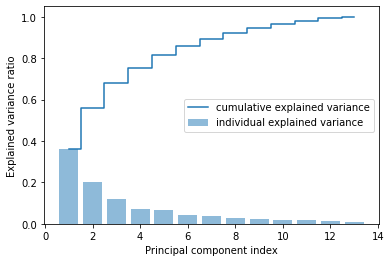

In [4]:
# Explained variance ratio
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [5]:
# PCA를 통해 차원 축소 후 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

lpca = PCA(n_components=4)
X_train_pca = lpca.fit_transform(X_train_std)
X_test_pca = lpca.transform(X_test_std)

lr=LogisticRegression()
lr.fit(X_train_pca, y_train)
y_train_pre=lr.predict(X_train_pca)
y_test_pre=lr.predict(X_test_pca)

from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pre))
print(metrics.accuracy_score(y_test, y_test_pre))

0.9758064516129032
0.9629629629629629


In [6]:
# LDA로 차원 축소 후 로지스틱 회귀
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda=LDA(n_components=2) # LDA에 n_components=2를 지정하면 LDA가 차원을 2로 줄여준다. 
X_train_lda=lda.fit_transform(X_train_std,y_train) # wine data에 의해 뽑힘.
X_test_lda=lda.transform(X_test_std) 

lr=LogisticRegression()
lr.fit(X_train_lda, y_train)
y_train_pred=lr.predict(X_train_lda)
y_test_pred=lr.predict(X_test_lda)

print(metrics.accuracy_score(y_train, y_train_pred)) 
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))

1.0
0.9629629629629629
[[18  0  0]
 [ 1 19  1]
 [ 0  0 15]]
